# Finetuning Gemini

We create our manual curated dataset from web via webscraping aswell as use existing datasets to power gemini directed towards ASU and function tools

Gemini has a [limit](https://cloud.google.com/vertex-ai/generative-ai/docs/models/gemini-supervised-tuning#gemini-1.5-flash) of training 128,000 examples via jsonl for finetuning purpose Gemini 1.5 Flash 

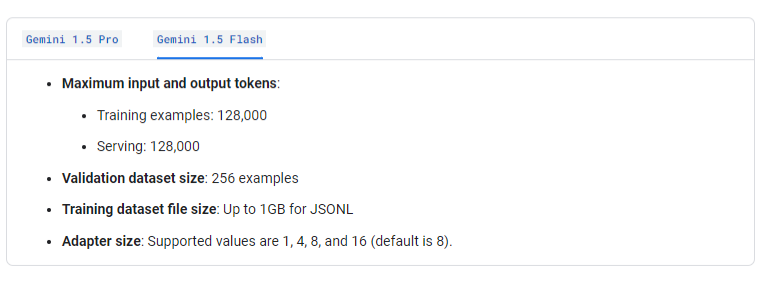
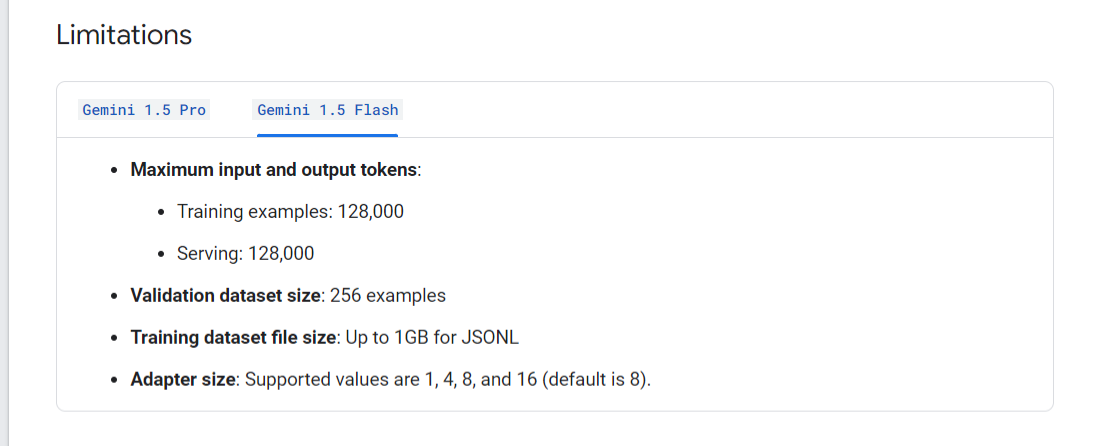
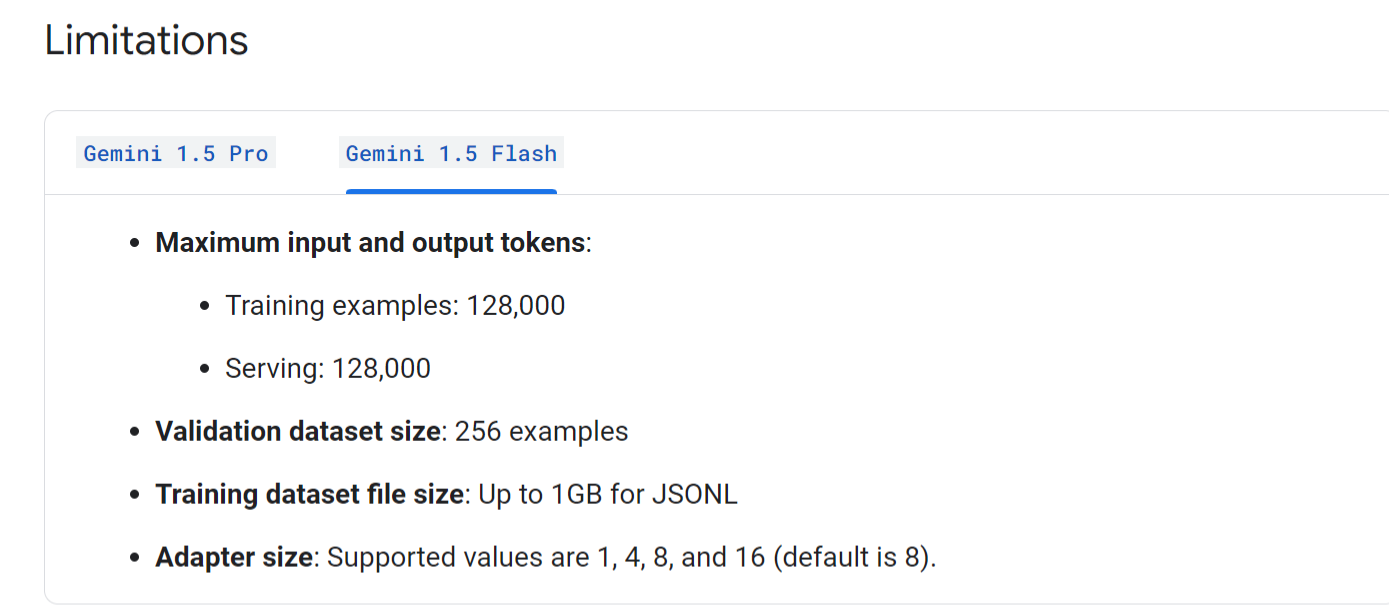

## Splitting Dataset

We will be splitting out the dataset in multiple parts: 

To allocate the dataset examples across defined categories while adhering to the **128,000 example limit** for Gemini 1.5 Flash:

| **Category**                  | **Description**                             | **Proportion (%)** | **Number of Examples** |
|--------------------------------|---------------------------------------------|---------------------|-------------------------|
| **Factual Questions**          | Questions requiring concise, factual answers, such as "What are the library hours?" | 30%                 | 38,400                 |
| **Action-Based Questions**     | Queries requiring JSON function calls, such as "Find the latest scholarships."      | 25%                 | 32,000                 |
| **Hybrid Questions**           | Queries needing reasoning + a function call, such as "Can you summarize this and get related events?" | 20%                 | 25,600                 |
| **Agent Communication Responses** | Multi-agent interaction responses combining reasoning and function calls           | 15%                 | 19,200                 |
| **Jailbreak Commands**         | Edge-case inputs requiring safe acknowledgment or refusal                            | 10%                 | 12,800                 |


### Dataset example for [gemini-1.5-pro and gemini-1.5-flash](https://cloud.google.com/vertex-ai/generative-ai/docs/models/gemini-supervised-tuning-prepare#dataset_example_for_gemini-15-pro_and_gemini-15-flash)

```json 
{
  "systemInstruction": {
    "role": "system",
    "parts": [
      {
        "text": "You are an AI assistant for ASU students. Provide helpful information about the university and use appropriate functions when necessary."
      }
    ]
  },
  "contents": [
    {
      "role": "user",
      "parts": [
        {
          "text": "What are the library hours today?"
        }
      ]
    },
    {
      "role": "model",
      "parts": [
        {
          "text": "To get the most up-to-date library hours, I'll need to check the current information. Let me do that for you. [FUNCTION_CALL: getlivelibrarystatusself()]"
        }
      ]
    }
  ]
}
```